In [1]:
import numpy as np
import pandas as pd
import collections
from sklearn.base import clone
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  VotingClassifier
from sklearn.utils import resample
from scipy.sparse import coo_matrix
from sklearn.ensemble import AdaBoostClassifier


# Plotting function

In [2]:


def plotDataset(X, y):
    for label in np.unique(y):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=label)
    plt.legend()
    plt.show()


def plotEstimator(trX, trY, teX, teY, estimator, title=''):
    estimator = clone(estimator).fit(trX, trY)
    h = .02
    x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
    y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    Z = estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
    # plt.legend()
    plt.title(title)
    plt.show()

# Dataset

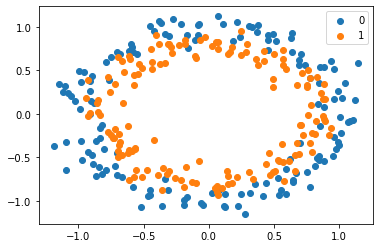

In [3]:
rs = 10
X, y = make_circles(300, noise=0.1, random_state=rs)
#Splitting dataset into training testing 
trX, teX, trY, teY = train_test_split(X, y, test_size=0.33,
random_state=rs)

plotDataset(X,y)


# Decision Tree

0.8181818181818182


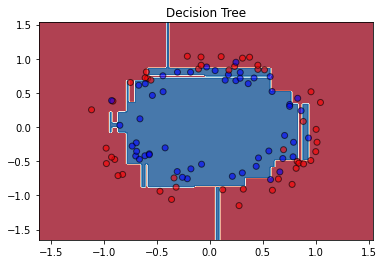

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


estimator = DecisionTreeClassifier(random_state=rs)
estimator.fit(trX, trY)
predY = estimator.predict(teX)
dtAccuracy = accuracy_score(teY, predY)
print(dtAccuracy)
plotEstimator(trX, trY, teX, teY, estimator, 'Decision Tree')

# Bagging From scratch

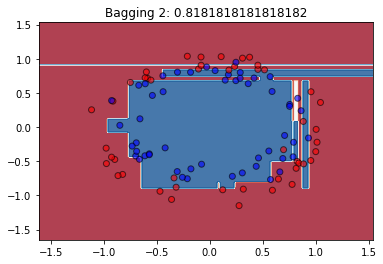

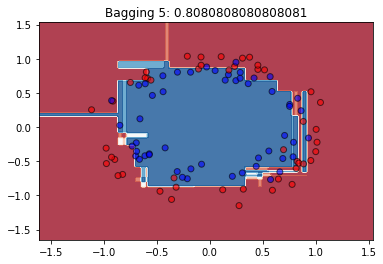

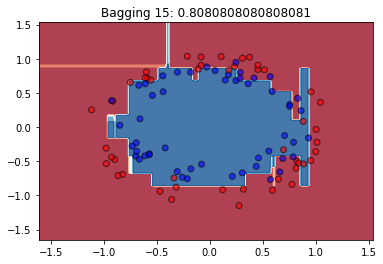

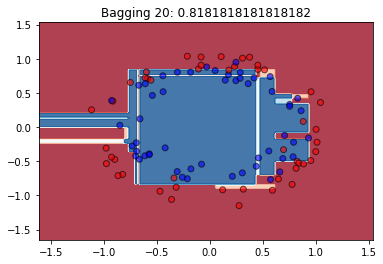

In [11]:
np.random.seed(rs)
for i in [2,5,15,20]:
    ests=[]
    for j in range(i):
        #Bootstraping dataset using resample function
        X_sparse = coo_matrix(trX)
        #setting random_state with j so all iterations will have different random_state
        RX, X_sparse, Ry = resample(trX, X_sparse, trY, random_state=j)
        #training decisiontree as a base classifier
        estimator = DecisionTreeClassifier()
        estimator.fit(RX, Ry)
        #adding trained classifier to array
        ests.append(['es'+str(j),estimator])
    #training votingclassifier with array of decision tree estimators
    vclf = VotingClassifier(estimators=ests, voting='soft')
    vclf = vclf.fit(trX, trY)
    score = vclf.score(teX, teY)
    plotEstimator(RX, Ry, teX, teY, vclf, f'Bagging {i}: {score}')
        
    


# Boosting

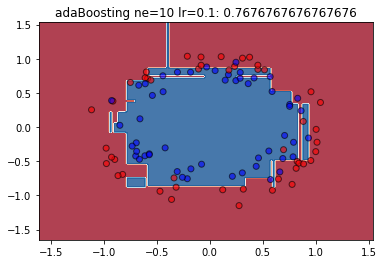

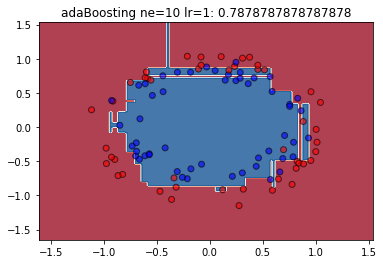

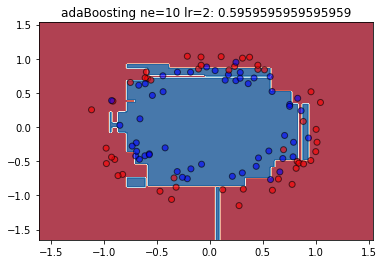

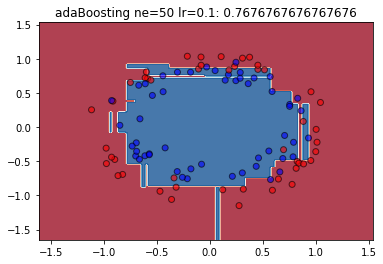

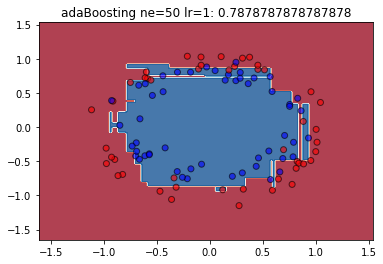

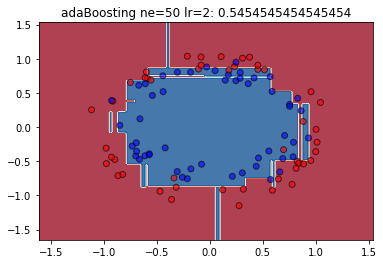

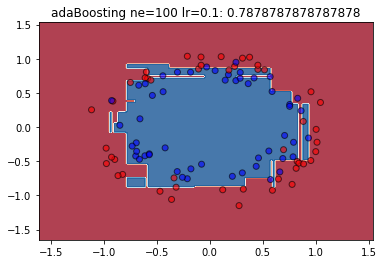

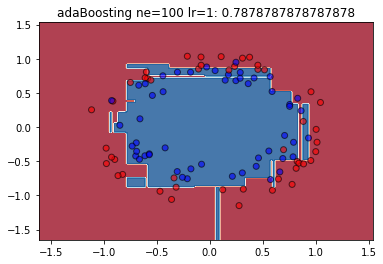

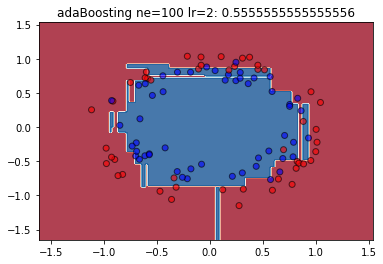

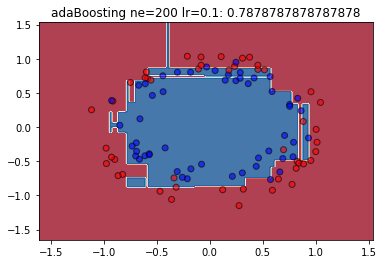

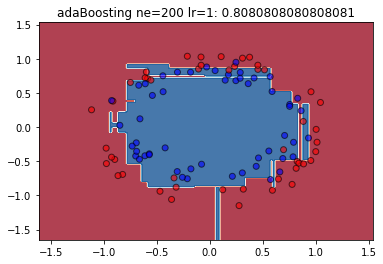

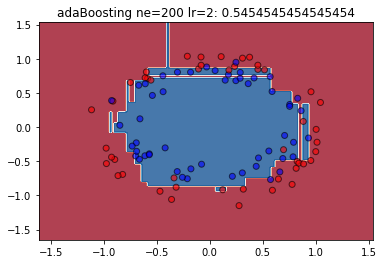

In [6]:
#runnig adaboost with all combinations of n_estimators and learning_rate
for ne in [10,50,100,200]:
    for lr in [0.1,1,2]:
        clf = AdaBoostClassifier(n_estimators=ne,learning_rate=lr ,random_state=rs)
        score = clf.fit(trX, trY).score(teX, teY)
        plotEstimator(trX, trY, teX, teY, estimator, f'adaBoosting ne={ne} lr={lr}: {score}')
